# Exemple d'utilsation de GPflow pour les processus gaussiens

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import gpflow 
from gpflow.mean_functions import Constant

Définition d'une fonction simple de simulation et génération de données d'entrée/sortie.

In [3]:
x=np.linspace(-1,1,200)

def Simulateur(x):
  return np.sin(2*np.pi*x)+x**2

y=Simulateur(x)

On choisit parmi nos données les données d'entrainement et de test. On crée un modèle de processus gaussien avec un noyau RBF et on l'entraine sur les données d'entrainement. Enfin, on fait des prédictions sur les données de test et on visualise les résultats.

In [59]:
N_train=8
train_indices = np.random.choice(len(x), size=N_train, replace=False)
#Entrainement
X_train = x[train_indices].reshape(-1, 1)
Y_train = y[train_indices].reshape(-1, 1)

#Création du modèle GP avec noyau RBF
kernel = gpflow.kernels.SquaredExponential() 
model = gpflow.models.GPR(data=(X_train, Y_train), kernel=kernel, mean_function= Constant())

#Entrainement du modèle
opt = gpflow.optimizers.Scipy()
opt.minimize(model.training_loss, model.trainable_variables)    

#Prédictions sur les données de test
mean, var = model.predict_f(x.reshape(-1, 1))

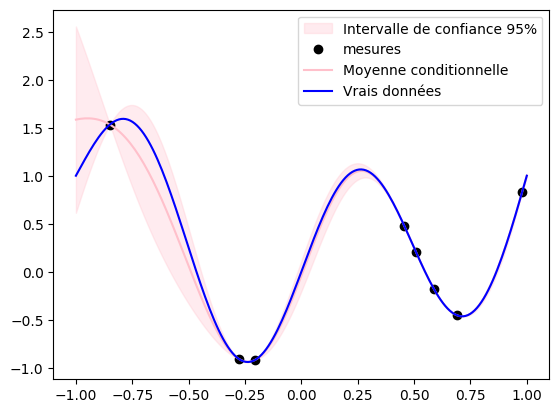

In [60]:
#Visualisation des résultats 
#Retransformer en numpy 1D 
mean = mean.numpy().reshape(-1)
var = var.numpy().reshape(-1)
upper=mean+1.96*np.sqrt(var)
lower=mean-1.96*np.sqrt(var)

plt.fill_between(x, lower, upper,color='pink', alpha=0.3,label='Intervalle de confiance 95%')
plt.plot(X_train,Y_train,'o',color='black',label='mesures')
plt.plot(x,mean,color='pink',label='Moyenne conditionnelle')
plt.plot(x,y,color='blue',label='Vrais données')
plt.legend()

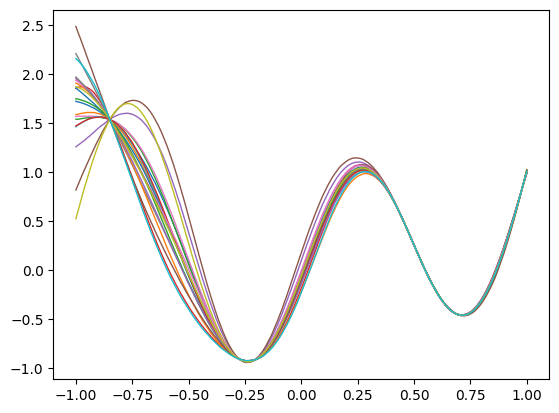

In [63]:
#Tirages aléatoires de réalisations du processus gaussien conditionnel
samples = model.predict_f_samples(x.reshape(-1, 1), num_samples=20)
for i in range(20):
    plt.plot(x, samples[i, :,:], lw=1)
plt.show()  

